In [1]:
# Load the final processed dataset
import os
import pandas as pd
FIGURE_PATH = "../Figures/"

DATA_PATH = "../Dataset/neo_processed.csv"
df_processed = pd.read_csv(DATA_PATH)
print("Loaded shape:", df_processed.shape)
df_processed.head()

Loaded shape: (39709, 45)


,sats,H,diameter,albedo,rot_per,epoch,e,a,q,i,...,rms,diameter_estimated_flag,epoch_cal,class,hazardous_label,risk_score,perihelion_ratio,eccentric_energy,uncertainty_total,observation_span_years
0,0.0,10.39,16.840000,0.250,5.270,2461000.5,0.222836,1.458121,1.133199,10.828467,...,0.29796,0.0,2025-11-21.0000000,AMO,0,0.648766,0.777164,0.072404,1.179775e-06,127.621918
1,0.0,15.59,2.736306,0.137,5.801,2461000.5,0.546596,2.636590,1.195441,11.573111,...,0.40589,1.0,2025-11-21.0000000,AMO,0,0.318619,0.453404,0.787726,4.594650e-06,113.558904
2,0.0,13.81,4.200000,0.310,28.410,2461000.5,0.571170,2.473629,1.060766,9.400060,...,0.25971,0.0,2025-11-21.0000000,AMO,0,0.908811,0.428830,0.806985,1.123263e-06,107.619178
3,0.0,9.18,37.675000,0.238,10.297,2461000.5,0.533213,2.664969,1.243972,26.680736,...,0.31447,0.0,2025-11-21.0000000,AMO,0,0.317274,0.466787,0.757694,4.382260e-07,101.046575
4,0.0,17.37,1.000000,0.137,4.400,2461000.5,0.434632,1.919831,1.085411,11.868823,...,0.40562,0.0,2025-11-21.0000000,AMO,0,0.533213,0.565368,0.362666,7.272382e-06,93.005479


In [2]:
# Check target column exists and print alternatives if not
possible_targets = ['hazardous_label', 'hazardous', 'is_hazardous', 'pha']
for t in possible_targets:
    if t in df_processed.columns:
        print(f"Found candidate target column: {t}")

# Choose hazardous_label if present, otherwise pick the first candidate found
if 'hazardous_label' in df_processed.columns:
    target_col = 'hazardous_label'
else:
    found = [c for c in possible_targets if c in df_processed.columns]
    if found:
        target_col = found[0]
        print(f"Using alternative target column: {target_col}")
    else:
        print("Available columns:\n", df_processed.columns.tolist())
        raise SystemExit("No target column found. Please ensure the processed dataset contains the target column.")

print(f"Target column selected: {target_col}")

Found candidate target column: hazardous_label
Target column selected: hazardous_label


In [3]:
# Prepare features and target
X = df_processed.drop(columns=[target_col])
y = df_processed[target_col]

# Drop any original/duplicate label columns if present
for c in ['pha', 'hazardous', 'is_hazardous']:
    if c in X.columns:
        X = X.drop(columns=[c])

# Fill numeric NaNs with median (safety)
num_cols = X.select_dtypes(include=['number']).columns
X[num_cols] = X[num_cols].fillna(X[num_cols].median())

# One-hot encode categorical features (if any)
X = pd.get_dummies(X, drop_first=True)

print("Feature matrix shape after preprocessing:", X.shape)
print("Sample columns:", X.columns[:20].tolist())

Feature matrix shape after preprocessing: (39709, 4169)
Sample columns: ['sats', 'H', 'diameter', 'albedo', 'rot_per', 'epoch', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'per', 'per_y', 'moid', 'moid_ld', 'moid_jup']


In [4]:
X.columns

Index(['sats', 'H', 'diameter', 'albedo', 'rot_per', 'epoch', 'e', 'a', 'q',
       'i',
       ...
       'epoch_cal_2025-10-16.0000000', 'epoch_cal_2025-10-17.0000000',
       'epoch_cal_2025-10-18.0000000', 'epoch_cal_2025-10-19.0000000',
       'epoch_cal_2025-10-20.0000000', 'epoch_cal_2025-10-21.0000000',
       'epoch_cal_2025-11-21.0000000', 'class_APO', 'class_ATE', 'class_IEO'],
      dtype='object', length=4169)

In [6]:
leaky = []
for col in X.columns:
    matches = (X[col] == y).sum()
    if matches > 0.5 * len(X):   # column matches target more than half the dataset
        leaky.append(col)

print("Leaky columns:", leaky)


Leaky columns: ['sats', 'epoch_cal_1990-10-27.0000000', 'epoch_cal_1991-01-18.0000000', 'epoch_cal_1991-05-12.0000000', 'epoch_cal_1991-10-07.0000000', 'epoch_cal_1991-10-08.0000000', 'epoch_cal_1991-11-05.0000000', 'epoch_cal_1991-12-07.0000000', 'epoch_cal_1992-02-28.0000000', 'epoch_cal_1992-12-27.0000000', 'epoch_cal_1993-01-29.0000000', 'epoch_cal_1993-03-30.0000000', 'epoch_cal_1993-04-27.0000000', 'epoch_cal_1993-05-22.0000000', 'epoch_cal_1994-03-12.0000000', 'epoch_cal_1994-03-15.0000000', 'epoch_cal_1994-03-17.0000000', 'epoch_cal_1994-04-09.0000000', 'epoch_cal_1994-07-07.0000000', 'epoch_cal_1994-09-02.0000000', 'epoch_cal_1994-10-12.0000000', 'epoch_cal_1994-11-01.0000000', 'epoch_cal_1994-11-04.0000000', 'epoch_cal_1994-12-09.0000000', 'epoch_cal_1995-02-03.0000000', 'epoch_cal_1995-02-06.0000000', 'epoch_cal_1995-02-28.0000000', 'epoch_cal_1995-03-30.0000000', 'epoch_cal_1995-07-06.0000000', 'epoch_cal_1996-01-17.0000000', 'epoch_cal_1996-01-23.0000000', 'epoch_cal_1996-

In [7]:
X_clean = X.drop(columns=leaky)
leaky = []
for col in X_clean.columns:
    matches = (X_clean[col] == y).sum()
    if matches > 0.5 * len(X_clean):   # column matches target more than half the dataset
        leaky.append(col)

print("Leaky columns:", leaky)


Leaky columns: []


In [9]:
X_sup =  X_clean.drop(columns=["epoch_cal_2025-11-21.0000000","class_APO","risk_score"])
print(X_sup.columns)

Index(['H', 'diameter', 'albedo', 'rot_per', 'epoch', 'e', 'a', 'q', 'i', 'om',
       'w', 'ma', 'ad', 'n', 'per', 'per_y', 'moid', 'moid_ld', 'moid_jup',
       't_jup', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om',
       'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per',
       'data_arc', 'n_obs_used', 'condition_code', 'rms',
       'diameter_estimated_flag', 'perihelion_ratio', 'eccentric_energy',
       'uncertainty_total', 'observation_span_years'],
      dtype='object')


In [10]:
remove_cols = [
    'hazardous', 'diameter', 'moid', 'moid_ld', 'moid_jup',
    'diameter_estimated_flag', 'condition_code',
    'epoch', 'epoch_cal', 'class'
]

df_unsup = X_sup.drop(columns=[c for c in remove_cols if c in X_sup.columns])
df_unsup = df_unsup.select_dtypes(include='number').dropna()
print(df_unsup.columns)

Index(['H', 'albedo', 'rot_per', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad',
       'n', 'per', 'per_y', 't_jup', 'sigma_e', 'sigma_a', 'sigma_q',
       'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n',
       'sigma_tp', 'sigma_per', 'data_arc', 'n_obs_used', 'rms',
       'perihelion_ratio', 'eccentric_energy', 'uncertainty_total',
       'observation_span_years'],
      dtype='object')


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_unsup = scaler.fit_transform(df_unsup)


In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_unsup)

df_processed["cluster"] = labels
df_processed["cluster"].value_counts()


c:\Users\mail2\Desktop\Boston\Sem 1\CS 506 DS\Project\CS506_Project\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\mail2\Desktop\Boston\Sem 1\CS 506 DS\Project\CS506_Project\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "c:\Users\mail2\Desktop\Boston\Sem 1\CS 506 DS\Project\CS506_Project\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
 

cluster
0    19771
3    14871
2     5066
1        1
Name: count, dtype: int64

In [13]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.03, random_state=42)
anomaly = iso.fit_predict(X_unsup)

df_processed["anomaly"] = (anomaly == -1).astype(int)
df_processed["anomaly"].value_counts()


anomaly
0    38517
1     1192
Name: count, dtype: int64

In [23]:
print(df_processed.groupby("anomaly")["moid"].median())
print(df_processed.groupby("anomaly")["diameter"].median())
print(df_processed.groupby("anomaly")["H"].median())
print(df_processed.groupby("anomaly")["eccentric_energy"].median())

anomaly
0    0.042817
1    0.084076
Name: moid, dtype: float64
anomaly
0    0.056907
1    0.078553
Name: diameter, dtype: float64
anomaly
0    24.000
1    23.307
Name: H, dtype: float64
anomaly
0    0.337093
1    0.517990
Name: eccentric_energy, dtype: float64


In [21]:
df_processed.groupby("cluster")[["moid","diameter","H","eccentric_energy"]].median()


,moid,diameter,H,eccentric_energy
cluster,,,,
0,0.042921,0.059589,23.90,0.601668
1,0.338407,0.206616,21.20,347.769803
2,0.141463,0.497926,19.28,0.434536
3,0.029883,0.035906,25.00,0.087301


In [20]:
pd.crosstab(df_processed["cluster"], df_processed["anomaly"])


anomaly,0,1
cluster,,
0,19080,691
1,0,1
2,4863,203
3,14574,297


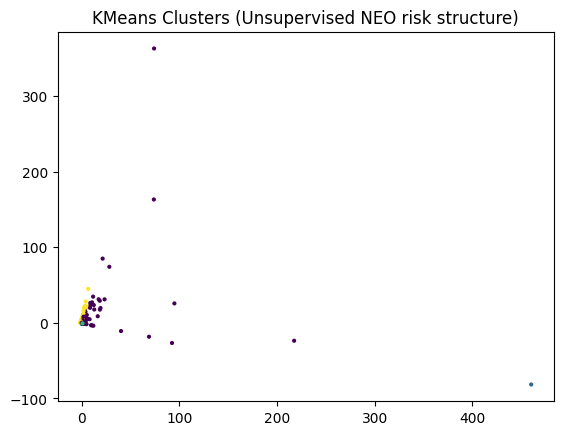

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
p2 = pca.fit_transform(X_unsup)

plt.scatter(p2[:,0], p2[:,1], c=labels, s=4)
plt.title("KMeans Clusters (Unsupervised NEO risk structure)")
plt.show()


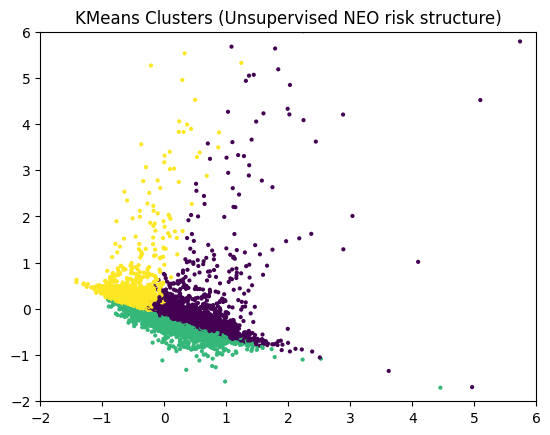

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
p2 = pca.fit_transform(X_unsup)


plt.scatter(p2[:,0], p2[:,1], c=labels, s=4)
plt.xlim(-2, 6)
plt.ylim(-2, 6)
plt.title("KMeans Clusters (Unsupervised NEO risk structure)")
plt.show()


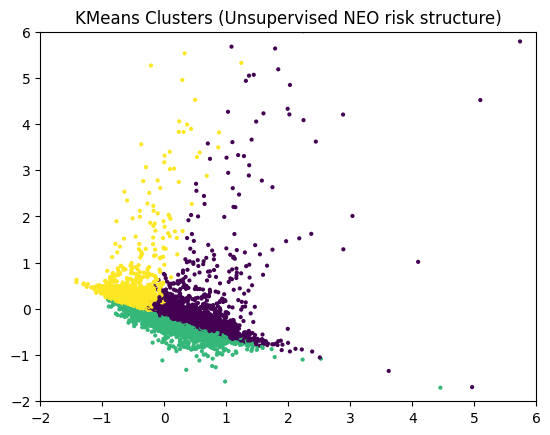

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
p2 = pca.fit_transform(X_unsup)


plt.scatter(p2[:,0], p2[:,1], c=labels, s=4)
plt.xlim(-2, 6)
plt.ylim(-2, 6)
plt.title("KMeans Clusters (Unsupervised NEO risk structure)")
plt.show()


In [29]:
# Define NASA PHA condition and create column
def nasa_pha(row):
    cond1 = row["moid"] < 0.05
    cond2 = (row["diameter"] > 0.14) or (row["H"] < 22)
    return int(cond1 and cond2)

df_processed["nasa_pha"] = df_processed.apply(nasa_pha, axis=1)

print("\n--- Anomaly vs NASA PHA correlation ---")
print(pd.crosstab(df_processed["anomaly"], df_processed["nasa_pha"]))

print("\n% of anomalies that are NASA-PHAs:")
print(df_processed[df_processed["anomaly"]==1]["nasa_pha"].mean())


--- Anomaly vs NASA PHA correlation ---
nasa_pha      0     1
anomaly              
0         36042  2475
1          1093    99

% of anomalies that are NASA-PHAs:
0.08305369127516779
